# Escuela Politécnica Nacional | EDA II-Informe N°4

### 1. Objetivos

- Describir los principios y pasos básicos del BFS, su funcionamiento y cómo utiliza estructuras de datos como la cola, marked y edgeTo.

- Implementar BFS para resolver problemas de conectividad en grafos, identificando si existe un camino entre dos nodos y determinando la ruta más corta en grafos sin pesos.

### 2. Introducción

La Búsqueda en Anchura (BFS, por sus siglas en inglés) es uno de los algoritmos más importantes en teoría de grafos, siendo ampliamente utilizado para explorar grafos y árboles. A diferencia de otros métodos de búsqueda, BFS explora todos los nodos de un grafo por niveles, expandiéndose hacia los vecinos de un nodo antes de avanzar a sus conexiones más profundas. Esta característica convierte a BFS en una herramienta poderosa para resolver problemas relacionados con la conectividad y la búsqueda de rutas más cortas en grafos sin pesos. Su implementación se basa en el uso de una estructura de datos en forma de cola, junto con marcadores de visita (marked) y registros de los padres (edgeTo) que facilitan la reconstrucción de rutas y la elaboración de un BFS tree.

En este informe, se explora cómo el algoritmo BFS puede aplicarse para resolver problemas prácticos, como encontrar rutas o determinar la existencia de caminos en una red de conexiones. 

### 3. Ejercicios planteados y/o programas implementados

**i) Dado el siguiente grafo, implemente el algortimo BSF donde se responda a las preguntas:**

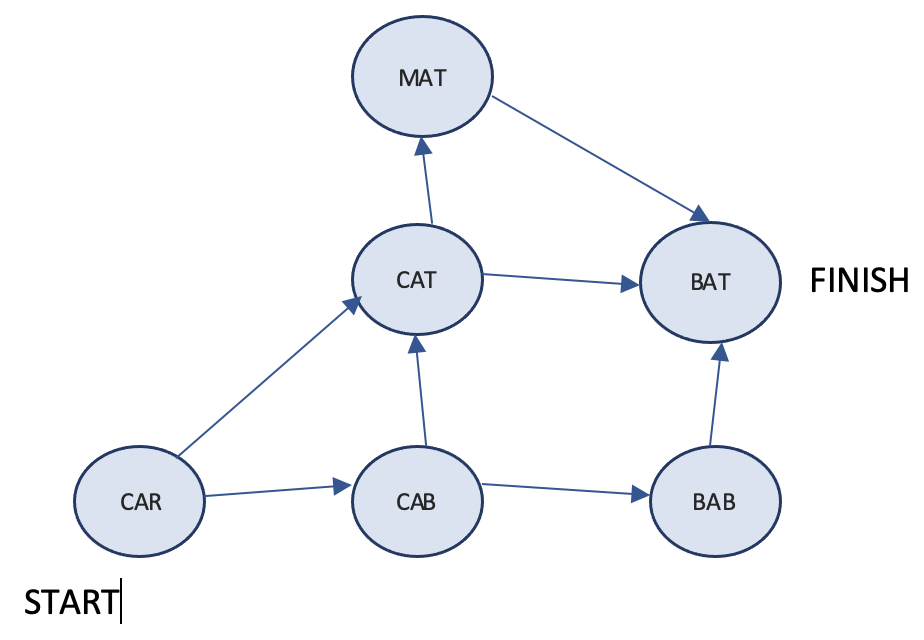

**a. Existe un path desde S hasta F?**

Sí, debido a que el algoritmo termina visitando el nodo "FINISH" durante su ejecución.

In [2]:
from collections import deque

In [4]:
grafo = {}
grafo["CARS"] = ["CAT", "CAB"] # es importante mantener el orden de la lista  
grafo["CAT"] = ["MAT", "BATF"] # de las values, porque es una lista y tiene indices.
grafo["CAB"] = ["CAT", "BAB"]
grafo["MAT"] = ["BATF"]
grafo["BAB"] = ["BATF"]
grafo["BATF"] = []

In [6]:
def search (name):
    search_queue = deque()
    search_queue += grafo[name]
    searched = []
    while search_queue:
        print(search_queue)
        word = search_queue.popleft()
        if not word in searched:
            if word == "BATF":
                print(word + " es el nodo finish, se ha encontrado un path")
                return True
            else:
                search_queue += grafo[word]
                searched.append(word)
    return False

In [8]:
search("CARS")

deque(['CAT', 'CAB'])
deque(['CAB', 'MAT', 'BATF'])
deque(['MAT', 'BATF', 'CAT', 'BAB'])
deque(['BATF', 'CAT', 'BAB', 'BATF'])
BATF es el nodo finish, se ha encontrado un path


True

**b. Cuál es esa ruta?**

Con algunos ajustes que se pueden realizar al algoritmo anterior, como aumentar la lista de padres *edgeTo*. Es posible encontrar la ruta del camino mas corto. 

In [10]:
def search_path(node_start, node_finish):
    search_queue = deque()
    search_queue.append(node_start)
    edgeTo = {node_start: None}  # Diccionario para registrar el padre de cada nodo
    searched = []

    while search_queue: # mientras la cola tenga elementos
        print(search_queue)
        word = search_queue.popleft()
        if word == node_finish:
            print(word + " es el nodo FINISH, se ha encontrado un path")
            # Si es el nodo FINISH, entonces se debe armar la ruta 
            # desde el final hasta el inicio
            path = []
            while word is not None: # mientras word no sea vacío
                path.append(word)
                word = edgeTo[word]
            path.reverse()  # Invertir para obtener la ruta desde el inicio
            print("La ruta encontrada es :", " -> ".join(path))
            return
        else:
            for neighbor in grafo[word]:
                if neighbor not in searched:
                    search_queue.append(neighbor)
                    edgeTo[neighbor] = word  # Registrar el nodo padre
            searched.append(word)

    print("No se encontró un path hasta el nodo FINISH.")
    return

In [12]:
search_path("CARS", "BATF")

deque(['CARS'])
deque(['CAT', 'CAB'])
deque(['CAB', 'MAT', 'BATF'])
deque(['MAT', 'BATF', 'BAB'])
deque(['BATF', 'BAB', 'BATF'])
BATF es el nodo FINISH, se ha encontrado un path
La ruta encontrada es : CARS -> CAT -> MAT -> BATF


**c. Dibuje el BFS Tree**

In [14]:
def bfs_tree(node_start):
    search_queue = deque()
    search_queue.append(node_start)
    marked = {node_start : True}
    edgeTo = {node_start : None}
    while search_queue: # mientras la cola este llena
        word = search_queue.popleft()
        for neighbor in grafo[word]:
            if neighbor not in marked:
                search_queue.append(neighbor)
                marked[neighbor] = True
                edgeTo[neighbor] = word
    return edgeTo

In [16]:
bfs_tree("CARS")

{'CARS': None,
 'CAT': 'CARS',
 'CAB': 'CARS',
 'MAT': 'CAT',
 'BATF': 'CAT',
 'BAB': 'CAB'}

Se devuelve el arbol como un diccionario, donde cada key es un nodo hijo y su value es su respectivo padre. Es importante tener en cuenta que el nodo padre tendrá como value *None* porque no posee ningun padre como tal.

A continuación, se muestra de forma gráfica el árbol:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
generate_tree = bfs_tree("CARS")
primera_clave = next(iter(generate_tree))  # Obtener la primera clave
generate_tree.pop(primera_clave)  # Eliminar la primera clave
G = nx.DiGraph()                  # para no referencial a un padre vacio

# Agregar los nodos
G.add_nodes_from(['CARS', 'CAT', 'CAB', 'MAT', 'BATF', 'BAB'])

# Agregar las relaciones al grafo
for hijo, padre in generate_tree.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con forma jerárquica
plt.figure(figsize=(8, 6))
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue",
        font_size=12, font_weight="bold", arrows=True)
plt.title("Árbol BFS")
plt.show()

ModuleNotFoundError: No module named 'networkx'

**ii) Genere el árbol BFS (BFS Tree) para el siguiente grafo G, sabiendo que el nodo de inicio es 0. Ese sería el componente conectado que contiene al nodo 0. Implemente el algoritmo BFS y use las estructuras auxiliares necesarias.**

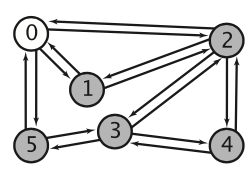

Se define la funcion bfs que realiza una búsqueda en anchura desde un nodo inicial (node_start) hasta un nodo objetivo (node_finish) en un grafo representado por el diccionario grafoNum.

**Inicialización:** Se crea una cola (search_queue) y se añade el nodo inicial. Dos diccionarios, marked y edgeTo, registran los nodos visitados y los caminos, respectivamente.

**Recorrido:** Mientras haya elementos en la cola, el BFS toma el primer nodo (current_node) y verifica si es el nodo objetivo. Si es el objetivo, imprime el diccionario edgeTo (que muestra el árbol BFS) y finaliza la búsqueda.

**Exploración de vecinos:** Para cada vecino del nodo actual, si no ha sido visitado, se añade a la cola, se marca como visitado en marked, y se guarda en edgeTo la referencia al nodo desde el cual fue alcanzado.

In [22]:
from collections import deque

In [24]:
## creacion del grafo
grafoNum = dict()
grafoNum["0"] = ["1", "2", "5"]
grafoNum["1"] = ["0", "2"]
grafoNum["2"] = ["0", "1", "3", "4"]
grafoNum["3"] = ["5", "2", "4"]
grafoNum["4"] = ["3", "2"]
grafoNum["5"] = ["0", "3"]

In [26]:
def bfs (node_start, node_finish):
    search_queue = deque()
    search_queue.append(node_start)
    marked = {node_start : True}
    edgeTo = {node_start : None}
    while search_queue: # mientras la cola este llena hacer
        print(search_queue) # imprimir la cola 
        current_node = search_queue.popleft() # decolar
        print("marked->", marked) # imprimir el diccionario de los nodos visitados
        for neighbor in grafoNum[current_node]:
            if neighbor not in marked:
                search_queue.append(neighbor)
                marked[neighbor] = True
                edgeTo[neighbor] = current_node
        print("")
    print("\nedgeTo", edgeTo)
    return edgeTo

Se devuelve el arbol como un diccionario, donde cada key es un nodo hijo y su value es su respectivo padre. Es importante tener en cuenta que el nodo padre tendrá como padre None porque no posee ningun padre como tal.

A continuación, se muestra de forma gráfica el árbol:

deque(['0'])
marked-> {'0': True}

deque(['1', '2', '5'])
marked-> {'0': True, '1': True, '2': True, '5': True}

deque(['2', '5'])
marked-> {'0': True, '1': True, '2': True, '5': True}

deque(['5', '3', '4'])
marked-> {'0': True, '1': True, '2': True, '5': True, '3': True, '4': True}

deque(['3', '4'])
marked-> {'0': True, '1': True, '2': True, '5': True, '3': True, '4': True}

deque(['4'])
marked-> {'0': True, '1': True, '2': True, '5': True, '3': True, '4': True}


edgeTo {'0': None, '1': '0', '2': '0', '5': '0', '3': '2', '4': '2'}


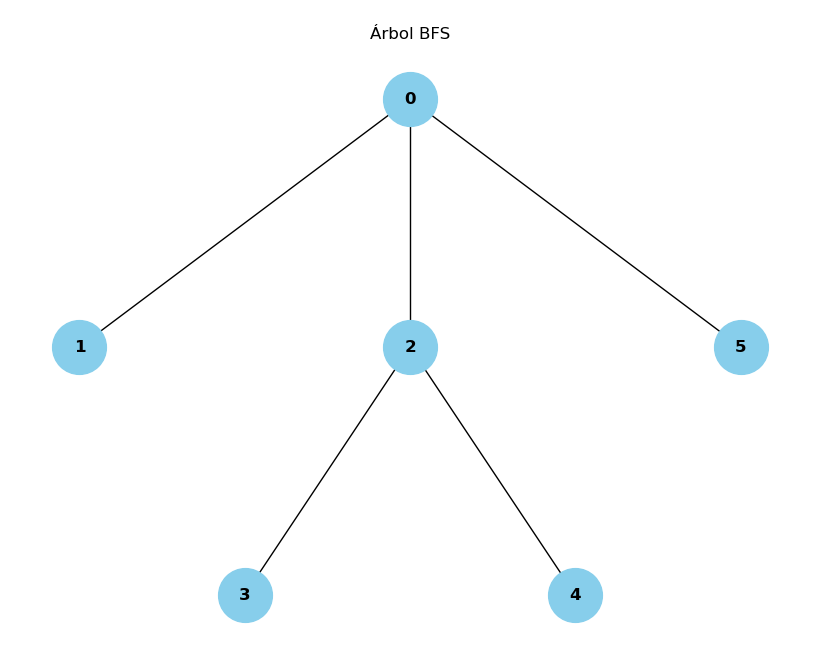

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
generate_bfs_tree = bfs("0", "4")
primera_clave = next(iter(generate_bfs_tree))  # Obtener la primera clave
generate_bfs_tree.pop(primera_clave)  # Eliminar la primera clave
G = nx.DiGraph()

# Agregar los nodos
G.add_nodes_from(["0", "1", "2", "3", "4", "5"])

# Agregar las relaciones al grafo
for hijo, padre in generate_bfs_tree.items():
    G.add_edge(padre, hijo)

# Dibujar el grafo con forma jerárquica
plt.figure(figsize=(8, 6))
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue",
        font_size=12, font_weight="bold", arrows=False)
plt.title("\nÁrbol BFS")
plt.show()

### 4. Conclusiones

El algoritmo de Búsqueda en Anchura (BFS) es especialmente valioso para la búsqueda de rutas mínimas en grafos no ponderados, ya que explora todos los nodos en niveles sucesivos desde el nodo de partida. Este enfoque asegura que, al encontrar el destino, el camino descubierto será el más corto en términos de número de nodos. Gracias a esta propiedad, BFS es ampliamente utilizado para resolver problemas donde se busca minimizar el número de pasos o conexiones entre dos puntos.

Además, la adaptabilidad del algoritmo BFS se destaca en su capacidad de ser implementado fácilmente con diferentes representaciones de grafos, y en combinación con estructuras como *marked*, *edgeTo*, y *queue*. Esta adaptabilidad facilita su integración en distintos problemas, haciéndolo una herramienta esencial en ciencias de la computación, sistemas de información y otras áreas relacionadas con redes y estructuras complejas.

### 5. Referencias bibliográficas

Python Software Foundation. (2023). Python Documentation: Collections. Disponible en https://docs.python.org

### 5. Declaración uso de IA

En el informe se usó la IA como una guía para recorrer el grafo de mejor manera. Es decir, se le solicitó una idea más clara de como obtener el path y a su vez, de como el algoritmo BFS logra obtener el camino mas corto. Además, se le pidió explicar si era mejor aplicar *.append* o *+=*, arrojando que la primera es más adecuada de usar porque mantiene cada grupo de nodos como un único elemento de la cola en lugar de dividirlo en nodos separados, lo que hace más eficiente el algoritmo cuando se trata de hallar la ruta completa de un nodo a otro. Mientras que *+=* descompone una lista grande y agrega sus elementos uno por uno, lo que llega a ser menos eficiente.